In [1]:
import pymongo
import numpy as np
import pandas as pd
import json 
import csv
import matplotlib.pyplot as plt
from datetime import datetime

In [19]:
movies=pd.read_csv('MOVIES.csv')
movies.head()

,adult,budget,genres,homepage,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,spoken_languages,vote_average,vote_count
0,False,30000000,"Animation, Comedy, Family",http://toystory.disney.com/toy-story,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,30-10-1995,373554033.0,81.0,Released,NaN,Toy Story,English,7.7,5415.0
1,False,65000000,"Adventure, Fantasy, Family",NaN,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,15-12-1995,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,"English, Français",6.9,2413.0
2,False,0,"Romance, Comedy",NaN,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,22-12-1995,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,English,6.5,92.0
3,False,16000000,"Comedy, Drama, Romance",NaN,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,22-12-1995,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,English,6.1,34.0
4,False,0,Comedy,NaN,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,10-02-1995,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,English,5.7,173.0


In [20]:
movies.shape

(43167, 20)

In [2]:
client = pymongo.MongoClient('mongodb://localhost:27017/')

In [3]:
db = client["Project"]
movies_metadata= db["movies"]

### Highest Revenue generated movies

In [5]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }}
   }
};

matching= { '$match': { '$and': [ { 'converted_revenue': { '$gt':1000000 } } ] } };

totalPriceCalculationStage = {
   '$project': {'_id':0,"title":1,'revenue': "$converted_revenue", 'vote_average':1 }
};

s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   matching,
   totalPriceCalculationStage,
   { '$sort': { 'revenue': -1 }},
    {'$limit':20}
])

ana=[]
for i in s:
    ana.append(i)
    print(i)

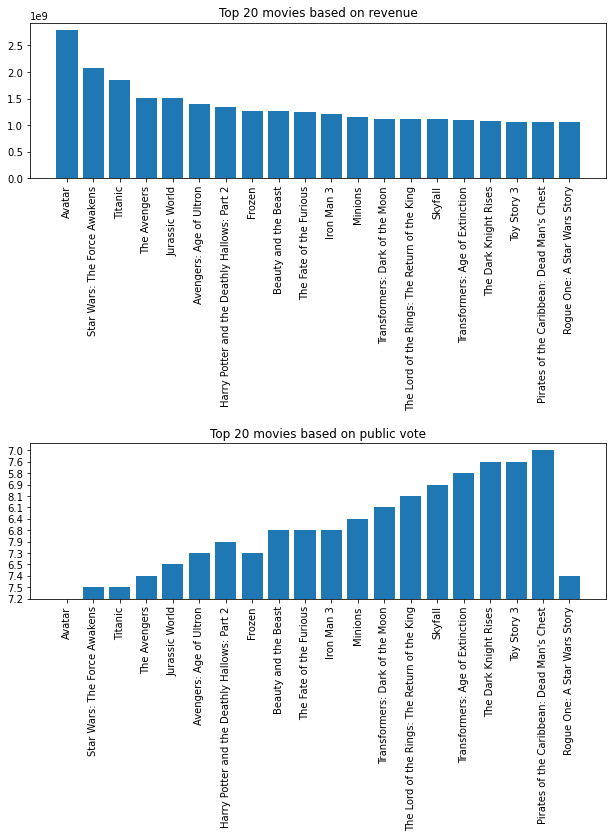

In [5]:
title=[]
revenue=[]
vote_average=[]
for i in ana:
    title.append(i['title'])
    revenue.append(i['revenue'])
    vote_average.append(i['vote_average'])

plt.figure(figsize = (20,20))
plt.subplot(2, 1, 1)
plt.bar(title, revenue)
plt.title('Top 20 movies based on revenue')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
plt.bar(title, vote_average)
plt.title('Top 20 movies based on public vote')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.5, 
                    top=0.5, 
                    wspace=1, 
                    hspace=1.7)
plt.show()

#### See how English play an important role (wider english audience)

{'_id': 'English', 'count': 2810}
{'_id': 'English, Español', 'count': 141}
{'_id': 'English, Français', 'count': 104}
{'_id': 'हिन्दी', 'count': 62}
{'_id': 'English, Italiano', 'count': 54}
{'_id': 'Pусский', 'count': 52}
{'_id': 'English, Pусский', 'count': 47}
{'_id': 'Español, English', 'count': 43}
{'_id': 'English, Deutsch', 'count': 42}
{'_id': 'Français, English', 'count': 25}
{'_id': 'Français', 'count': 24}
{'_id': 'English, Português', 'count': 22}
{'_id': 'English, 日本語', 'count': 19}
{'_id': 'Español', 'count': 18}
{'_id': '日本語', 'count': 18}
{'_id': 'English, 普通话', 'count': 17}
{'_id': 'Český, English', 'count': 15}
{'_id': 'Deutsch, English', 'count': 14}
{'_id': 'Italiano, English', 'count': 14}
{'_id': 'Italiano', 'count': 13}
{'_id': '한국어/조선말', 'count': 13}


C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47568 missing from current font.
  fon

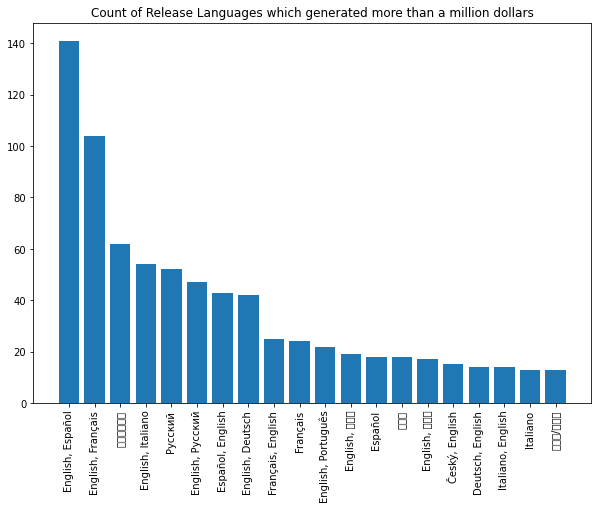

In [106]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };

totalPriceCalculationStage = {
   '$project': {'_id':0,"spoken_languages":1,'revenue': "$converted_revenue" }
};

s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   matching,
   totalPriceCalculationStage,
    {'$match':{'revenue':{'$gt':1000000}}},
    {'$project':{'revenue':0}},
    {'$group' : {'_id' : "$spoken_languages", 'count' : {'$sum' : 1}}},
    { '$sort': { 'count': -1 }},
    {'$limit':21}
])

ana=[]
for i in s:
    ana.append(i)
    print(i)
    
language=[]
count=[]
for i in ana:
    language.append(i['_id'])
    count.append(i['count'])

plt.figure(figsize = (10,7))
plt.bar(language[1:], count[1:])
plt.title('Count of Release Languages which generated more than a million dollars')
plt.xticks(rotation=90)
plt.show()

In [14]:
language[1:][2]

'हिन्दी'

In [13]:
np.array(language[1:],dtype='uint8')

ValueError: invalid literal for int() with base 10: 'English, Español'

#### Prodcution houses which were able to produce profitable movies

In [29]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   matching,
    {'$match':{'converted_revenue':{'$gt':1000000}}},
    {'$group' : {'_id' : "$production_companies", 'count' : {'$sum' : 1}}},
    {'$match':{'count':{'$gt':5}}},
    { '$sort': { 'count': -1 }}
])

ana=[]
for i in s:
    ana.append(i)
    print(i)

{'_id': 'unk', 'count': 99}
{'_id': 'Paramount Pictures', 'count': 90}
{'_id': 'Universal Pictures', 'count': 59}
{'_id': 'Metro-Goldwyn-Mayer (MGM)', 'count': 53}
{'_id': 'Warner Bros.', 'count': 51}
{'_id': 'Twentieth Century Fox Film Corporation', 'count': 44}
{'_id': 'Columbia Pictures', 'count': 39}
{'_id': 'New Line Cinema', 'count': 38}
{'_id': 'Touchstone Pictures', 'count': 24}
{'_id': 'Walt Disney Pictures', 'count': 23}
{'_id': 'Orion Pictures', 'count': 20}
{'_id': 'Columbia Pictures Corporation', 'count': 19}
{'_id': 'United Artists', 'count': 18}
{'_id': 'TriStar Pictures', 'count': 16}
{'_id': 'Walt Disney Productions', 'count': 14}
{'_id': 'Miramax Films', 'count': 13}
{'_id': 'Dimension Films', 'count': 13}
{'_id': 'Walt Disney Pictures, Pixar Animation Studios', 'count': 12}
{'_id': 'DreamWorks Animation', 'count': 12}
{'_id': 'Yash Raj Films', 'count': 11}
{'_id': 'Imagine Entertainment, Universal Pictures', 'count': 10}
{'_id': 'Walt Disney Pictures, Walt Disney Ani

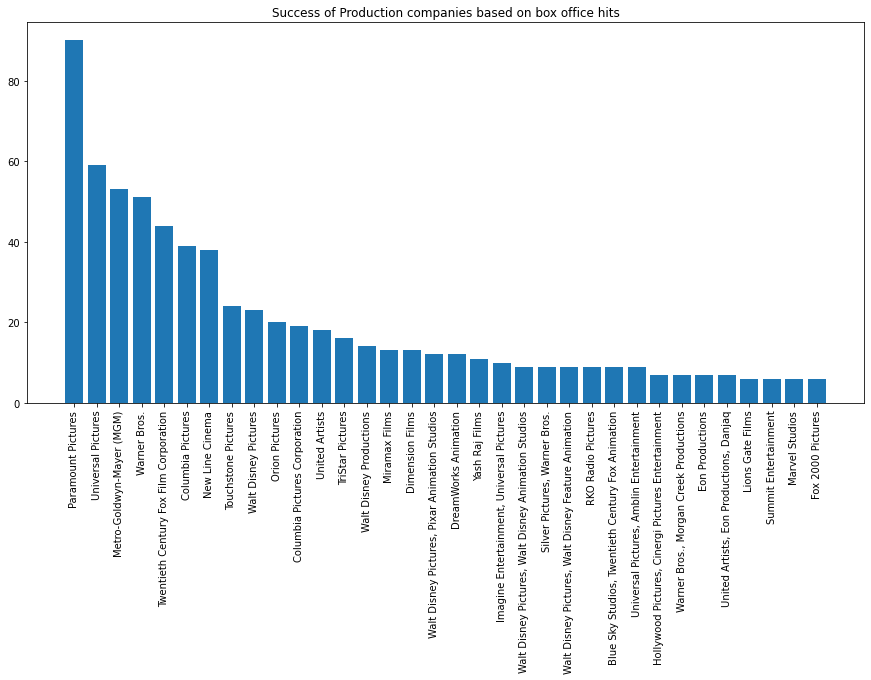

In [34]:
production_company=[]
count=[]
for i in ana:
    production_company.append(i['_id'])
    count.append(i['count'])

plt.figure(figsize = (15,7))
plt.bar(production_company[1:], count[1:])
plt.title('Success of Production companies based on box office hits')
plt.xticks(rotation=90)
plt.show()

#### Most successful production houses(in terms of total revenue)

In [35]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   matching,
    {'$group' : {'_id' : "$production_companies", 'count' : {'$sum' : '$converted_revenue'}}}, 
    { '$sort': { 'count': -1 }},
    {'$limit':10}
])

ana=[]
for i in s:
    ana.append(i)
    print(i)

{'_id': 'Walt Disney Pictures, Pixar Animation Studios', 'count': 7092295465.0}
{'_id': 'Paramount Pictures', 'count': 6406134311.0}
{'_id': 'DreamWorks Animation', 'count': 5678788108.0}
{'_id': 'Walt Disney Pictures, Walt Disney Animation Studios', 'count': 4855565504.0}
{'_id': 'Blue Sky Studios, Twentieth Century Fox Animation', 'count': 4593632353.0}
{'_id': 'Warner Bros., Heyday Films', 'count': 4168477803.0}
{'_id': 'Marvel Studios', 'count': 4167349882.0}
{'_id': 'Columbia Pictures', 'count': 3252804305.0}
{'_id': 'Universal Pictures, Illumination Entertainment', 'count': 3203800871.0}
{'_id': 'Universal Pictures', 'count': 3027707958.0}


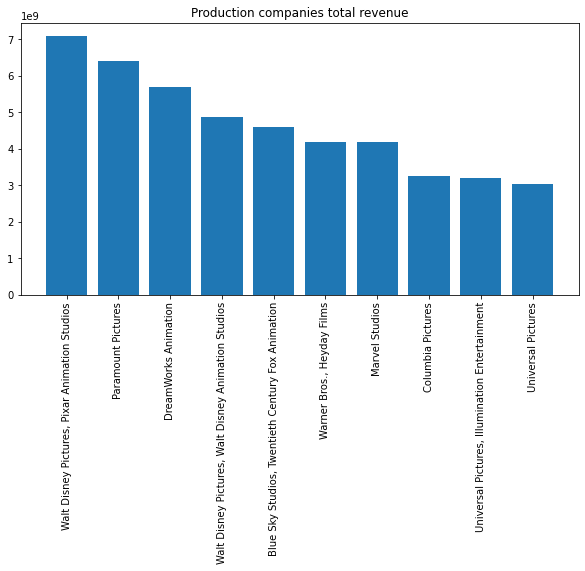

In [37]:
production_company=[]
revenue=[]
for i in ana:
    production_company.append(i['_id'])
    revenue.append(i['count'])

plt.figure(figsize = (10,5))
plt.bar(production_company, revenue)
plt.title('Production companies total revenue')
plt.xticks(rotation=90)
plt.show()

#### Walt Disney Pictures, Pixar Animation Studios trend 

In [38]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
       "created_at": { 
            "$dateFromString": { 
                "dateString": "$release_date",
                "format": "%d-%m-%Y" 
            } 
        }
       
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   {'$match':{"production_companies": "Walt Disney Pictures, Pixar Animation Studios"}},
   priceQtyConversionStage,
   matching,
   {'$project': {'_id':0,'original_title':1,'budget':1,'revenue':1,'created_at':1}},
])
ana=[]
for i in s:
    ana.append(i)
    print(i)

{'budget': '120000000', 'original_title': "A Bug's Life", 'revenue': '363258859.0', 'created_at': datetime.datetime(1998, 11, 25, 0, 0)}
{'budget': '115000000', 'original_title': 'Monsters, Inc.', 'revenue': '562816256.0', 'created_at': datetime.datetime(2001, 11, 1, 0, 0)}
{'budget': '92000000', 'original_title': 'The Incredibles', 'revenue': '631442092.0', 'created_at': datetime.datetime(2004, 11, 5, 0, 0)}
{'budget': '120000000', 'original_title': 'Cars', 'revenue': '461983149.0', 'created_at': datetime.datetime(2006, 6, 8, 0, 0)}
{'budget': '150000000', 'original_title': 'Ratatouille', 'revenue': '623722818.0', 'created_at': datetime.datetime(2007, 6, 22, 0, 0)}
{'budget': '200000000', 'original_title': 'Toy Story 3', 'revenue': '1066969703.0', 'created_at': datetime.datetime(2010, 6, 16, 0, 0)}
{'budget': '200000000', 'original_title': 'Cars 2', 'revenue': '559852396.0', 'created_at': datetime.datetime(2011, 6, 11, 0, 0)}
{'budget': '185000000', 'original_title': 'Brave', 'revenue

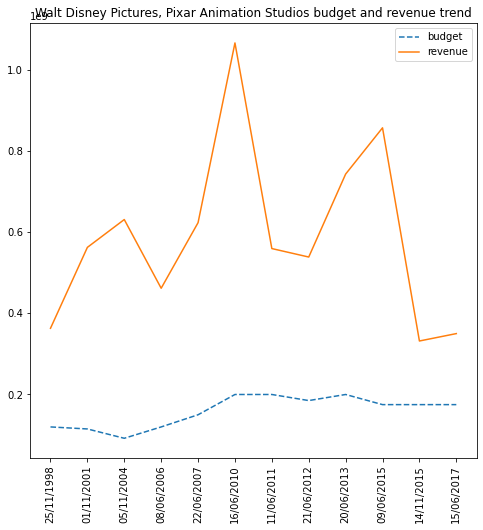

In [42]:
date=[]
budget=[]
revenue=[]
for i in ana:
    date.append(i['created_at'].strftime("%d/%m/%Y"))
    budget.append(int(i['budget']))
    revenue.append(float(i['revenue']))

    
plt.figure(figsize = (8,8))
plt.plot(date,budget, label = "budget",linestyle="--")
plt.plot(date,revenue, label = "revenue")
plt.title('Walt Disney Pictures, Pixar Animation Studios budget and revenue trend')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Runtime of Walt Disney Pictures, Pixar Animation Studios

In [6]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
       "created_at": { 
            "$dateFromString": { 
                "dateString": "$release_date",
                "format": "%d-%m-%Y" 
            } 
        }
       
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   {'$match':{"production_companies": "Walt Disney Pictures, Pixar Animation Studios"}},
   priceQtyConversionStage,
   matching,
   {'$project': {'_id':0,'original_title':1,'runtime':1,'vote_average':1}},
   { '$sort': { 'created_at':1}}
])

summ=[]
for i in s:
    summ.append(i)
    print(i)

{'original_title': "A Bug's Life", 'runtime': '95.0', 'vote_average': '6.8'}
{'original_title': 'Monsters, Inc.', 'runtime': '92.0', 'vote_average': '7.5'}
{'original_title': 'The Incredibles', 'runtime': '115.0', 'vote_average': '7.4'}
{'original_title': 'Cars', 'runtime': '117.0', 'vote_average': '6.6'}
{'original_title': 'Ratatouille', 'runtime': '111.0', 'vote_average': '7.5'}
{'original_title': 'Toy Story 3', 'runtime': '103.0', 'vote_average': '7.6'}
{'original_title': 'Cars 2', 'runtime': '106.0', 'vote_average': '5.8'}
{'original_title': 'Brave', 'runtime': '93.0', 'vote_average': '6.7'}
{'original_title': 'Monsters University', 'runtime': '104.0', 'vote_average': '7.0'}
{'original_title': 'Inside Out', 'runtime': '94.0', 'vote_average': '7.9'}
{'original_title': 'The Good Dinosaur', 'runtime': '93.0', 'vote_average': '6.6'}
{'original_title': 'Cars 3', 'runtime': '109.0', 'vote_average': '6.6'}


#### Indian movies

In [104]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   {'$match':{"production_countries": "India"}},
   priceQtyConversionStage,
   matching,
   {'$project': {'_id':0,'original_title':1,'converted_revenue':1}},
   { '$sort': { 'converted_revenue':-1}},
    {'$limit':20}
])

ana=[]
for i in s:
    ana.append(i)
    print(i)

{'original_title': 'दंगल', 'converted_revenue': 310000000.0}
{'original_title': 'Baahubali 2: The Conclusion', 'converted_revenue': 230000000.0}
{'original_title': 'PK', 'converted_revenue': 120000000.0}
{'original_title': 'Sultan', 'converted_revenue': 102000000.0}
{'original_title': 'Baahubali: The Beginning', 'converted_revenue': 100000000.0}
{'original_title': 'Dilwale Dulhania Le Jayenge', 'converted_revenue': 100000000.0}
{'original_title': '7Aum Arivu', 'converted_revenue': 98900000.0}
{'original_title': 'Bajrangi Bhaijaan', 'converted_revenue': 98000000.0}
{'original_title': 'धूम ३', 'converted_revenue': 91000000.0}
{'original_title': 'Ghajini', 'converted_revenue': 76000000.0}
{'original_title': '3 Idiots', 'converted_revenue': 70000000.0}
{'original_title': 'प्रेम रतन धन पायो', 'converted_revenue': 67000000.0}
{'original_title': 'Chennai Express', 'converted_revenue': 62000000.0}
{'original_title': 'எந்திரன்', 'converted_revenue': 62000000.0}
{'original_title': 'Dilwale', 'co

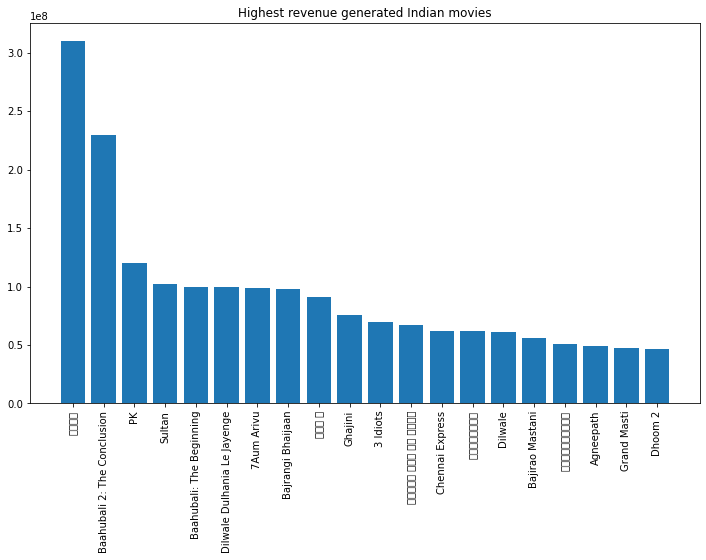

In [82]:
title=[]
converted_revenue=[]
for i in ana:
    title.append(i['original_title'])
    converted_revenue.append(i['converted_revenue'])

plt.figure(figsize = (12,7))
plt.bar(title, converted_revenue)
plt.title('Highest revenue generated Indian movies')
plt.xticks(rotation=90)
plt.show()

#### Most favourite Indian movie

In [103]:
priceQtyConversionStage = {
   '$addFields': {
       
      'converted_vote_average': { '$convert': { 
              'input': "$vote_average", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
   }
};

s=db.movies_metadata.aggregate( [
    priceQtyConversionStage,
   {'$match':{"production_countries": "India"}},
   {'$project': {'_id':0,'original_title':1,'converted_vote_average':1}},
   { '$sort': { 'converted_vote_average':-1}},
   {'$limit':20}
])

ana=[]
for i in s:
    ana.append(i)
    print(i)

{'original_title': 'Krantiveer', 'converted_vote_average': 10.0}
{'original_title': 'Time Pass', 'converted_vote_average': 10.0}
{'original_title': 'Mera Naam Joker', 'converted_vote_average': 10.0}
{'original_title': 'Shuttlecock Boys', 'converted_vote_average': 10.0}
{'original_title': 'Dilwale Dulhania Le Jayenge', 'converted_vote_average': 9.1}
{'original_title': 'English, August', 'converted_vote_average': 9.0}
{'original_title': 'Tashi and the Monk', 'converted_vote_average': 9.0}
{'original_title': 'कट्यार काळजात घुसली', 'converted_vote_average': 9.0}
{'original_title': 'Shree 420', 'converted_vote_average': 9.0}
{'original_title': 'Natsamrat', 'converted_vote_average': 8.8}
{'original_title': 'സന്ദേശം', 'converted_vote_average': 8.8}
{'original_title': 'सैराट', 'converted_vote_average': 8.7}
{'original_title': 'జెంటిల్మేన్', 'converted_vote_average': 8.5}
{'original_title': 'Daayen Ya Baayen', 'converted_vote_average': 8.5}
{'original_title': 'യോദ്ധാ', 'converted_vote_average':

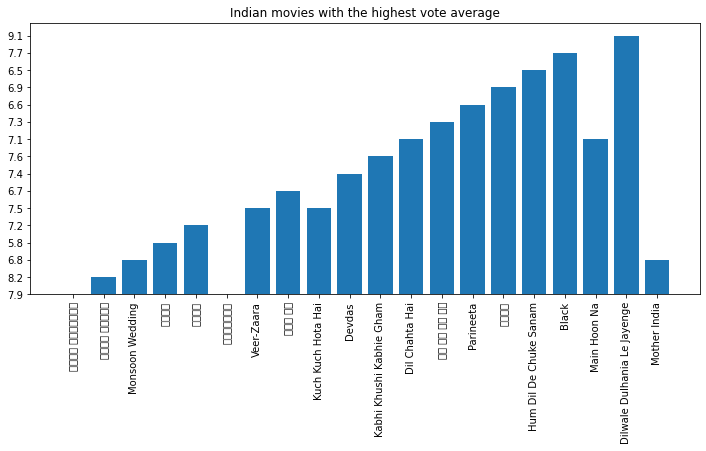

In [89]:
title=[]
vote_average=[]
for i in ana:
    title.append(i['original_title'])
    vote_average.append(i['vote_average'])

plt.figure(figsize = (12,5))
plt.bar(title, vote_average)
plt.title('Indian movies with the highest vote average')
plt.xticks(rotation=90)
plt.show()

In [75]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   {'$match':{"production_countries": "India"}},
   priceQtyConversionStage,
   matching,
    {'$match':{'converted_revenue':{'$gt':1000000}}},
    {'$group' : {'_id' : "$production_companies", 'count' : {'$sum' : 1}}},
    {'$match':{'count':{'$gt':1}}},
    { '$sort': { 'count': -1 }}
])

ana=[]
for i in s:
    ana.append(i)
    print(i)

{'_id': 'unk', 'count': 16}
{'_id': 'Yash Raj Films', 'count': 10}
{'_id': 'UTV Motion Pictures', 'count': 4}
{'_id': 'Dharma Productions', 'count': 3}
{'_id': 'Madras Talkies', 'count': 2}
{'_id': 'AVM Productions', 'count': 2}
{'_id': 'Studio Green, Thirukumaran Entertainment', 'count': 2}
{'_id': 'Red Chillies Entertainment', 'count': 2}
{'_id': 'Sun Pictures', 'count': 2}
{'_id': 'Reliance Entertainment', 'count': 2}
{'_id': 'Arka Media Works', 'count': 2}


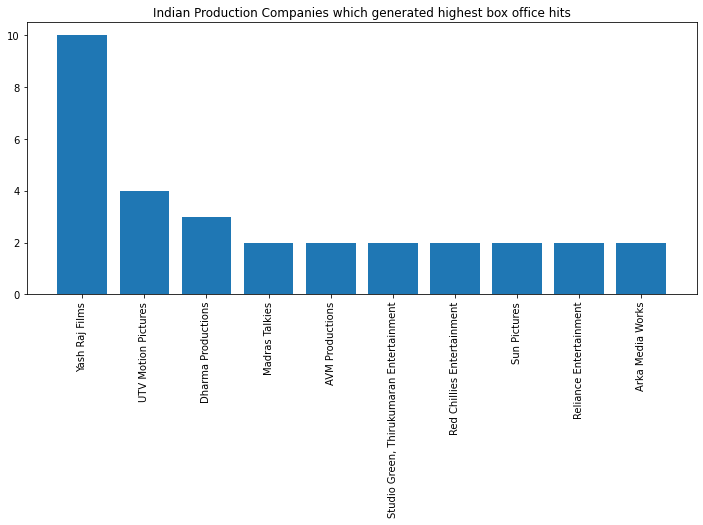

In [78]:
production_company=[]
count=[]
for i in ana:
    production_company.append(i['_id'])
    count.append(i['count'])

plt.figure(figsize = (12,5))
plt.bar(production_company[1:], count[1:])
plt.title('Indian Production Companies which generated highest box office hits')
plt.xticks(rotation=90)
plt.show()

#### Movies produced by Yash-raj

In [128]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
         "created_at": { 
            "$dateFromString": { 
                "dateString": "$release_date",
                "format": "%d-%m-%Y" 
            } 
        }
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   {'$match':{"production_companies": "Yash Raj Films"}},
   priceQtyConversionStage,
   matching,
   {'$project': {'_id':0,'original_title':1,'revenue':1,'budget':1,'release_date':1}},
   { '$sort': { 'release_date':1}}
])

ana=[]
for i in s:
    ana.append(i)
    print(i)

{'budget': '10400000', 'original_title': 'Sultan', 'release_date': '06-07-2016', 'revenue': '102000000.0'}
{'budget': '6250000', 'original_title': 'Badmaa$h Company', 'release_date': '07-05-2010', 'revenue': '8500000.0'}
{'budget': '5510000', 'original_title': 'Mere Brother Ki Dulhan', 'release_date': '09-09-2011', 'revenue': '18050000.0'}
{'budget': '7000000', 'original_title': 'Veer-Zaara', 'release_date': '12-11-2004', 'revenue': '29385320.0'}
{'budget': '2400000', 'original_title': 'Bachna Ae Haseeno', 'release_date': '14-08-2008', 'revenue': '9600000.0'}
{'budget': '19500000', 'original_title': 'धूम ३', 'release_date': '18-12-2013', 'revenue': '91000000.0'}
{'budget': '13200000', 'original_title': 'Dilwale Dulhania Le Jayenge', 'release_date': '20-10-1995', 'revenue': '100000000.0'}
{'budget': '11000000', 'original_title': 'Dhoom 2', 'release_date': '24-11-2006', 'revenue': '46396427.0'}
{'budget': '5300000', 'original_title': 'Fanaa', 'release_date': '26-05-2006', 'revenue': '221

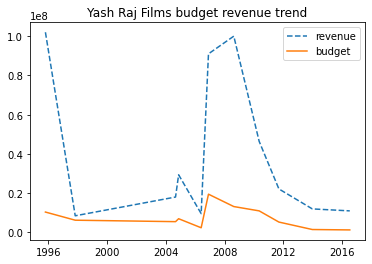

In [132]:
release_date=[]
original_title=[]
revenue=[]
budget=[]

for i in ana:
    release_date.append(datetime.strptime(i['release_date'], '%d-%m-%Y'))
    original_title.append(i['original_title'])
    revenue.append(int(float(i['revenue'])))
    budget.append(int(float(i['budget'])))
release_date.sort()

    
#plt.figure(figsize = (10,10))
plt.plot(release_date,revenue, label = "revenue",linestyle="--")
plt.plot(release_date,budget, label = "budget",linestyle="-")
plt.title('Yash Raj Films budget revenue trend')
plt.legend()
plt.show()

#### Popularity

In [43]:
s=db.movies_metadata.aggregate([ 
    
    
    {'$addFields': {
    
            'converted_popularity': { '$convert': { 
              'input': "$popularity", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }}
  
        
    }},
                                {'$group' : {'_id' : "$genres", 'count' : {'$sum' : '$converted_popularity'}}},
                               {'$project': {'_id':1,'count':1}},
                               {'$sort':{ 'count':-1}},
{'$limit':20} ])

ana=[]
for i in s:
    ana.append(i)
    print(i)

{'_id': 'Drama', 'count': 9358.685363}
{'_id': 'Comedy', 'count': 7907.157106}
{'_id': 'Drama, Romance', 'count': 3516.605127}
{'_id': 'Comedy, Drama', 'count': 3091.289736}
{'_id': 'Comedy, Romance', 'count': 2549.821516}
{'_id': 'Horror', 'count': 2435.453475}
{'_id': 'Comedy, Drama, Romance', 'count': 2355.457366}
{'_id': 'Horror, Thriller', 'count': 2225.744183}
{'_id': 'Documentary', 'count': 2166.552291}
{'_id': 'Drama, Thriller', 'count': 1689.521065}
{'_id': 'Action, Thriller', 'count': 1366.36529}
{'_id': 'Crime, Drama', 'count': 1150.916323}
{'_id': 'Drama, Comedy', 'count': 1143.411494}
{'_id': 'Thriller', 'count': 1110.493863}
{'_id': 'Crime, Drama, Thriller', 'count': 1005.294968}
{'_id': 'Drama, History', 'count': 895.609022}
{'_id': 'Animation, Family', 'count': 890.698138}
{'_id': 'Action, Comedy', 'count': 806.655767}
{'_id': 'Action, Crime, Thriller', 'count': 743.17984}
{'_id': 'unk', 'count': 730.085507}


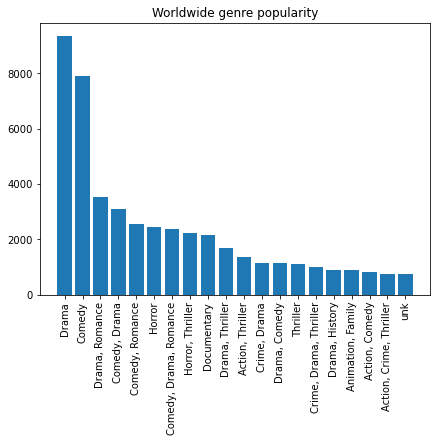

In [48]:
genre=[]
popularity=[]
for i in ana:
    genre.append(i['_id'])
    popularity.append(i['count'])
    
plt.figure(figsize = (7,5))
plt.bar(genre, popularity)
plt.title('Worldwide genre popularity')
plt.xticks(rotation=90)
plt.show()

#### Which production company is successful at producing drama

In [49]:
s=db.movies_metadata.aggregate( [
    
    {'$match':{"genres": "Drama"}},
    {'$group' : {'_id' : "$production_companies", 'count' : {'$sum' : 1}}},
    {'$project': {'_id':1,'count':1}},
    { '$sort': { 'count':-1}},
    {'$limit':11}
   
])
ana=[]
for i in s:
    ana.append(i)
    print(i)

{'_id': 'unk', 'count': 1126}
{'_id': 'Metro-Goldwyn-Mayer (MGM)', 'count': 92}
{'_id': 'Warner Bros.', 'count': 58}
{'_id': 'Twentieth Century Fox Film Corporation', 'count': 45}
{'_id': 'Paramount Pictures', 'count': 38}
{'_id': 'Shôchiku Eiga', 'count': 26}
{'_id': 'RKO Radio Pictures', 'count': 25}
{'_id': 'Columbia Pictures Corporation', 'count': 22}
{'_id': 'Mosfilm', 'count': 18}
{'_id': 'Universal Pictures', 'count': 17}
{'_id': 'Columbia Pictures', 'count': 16}


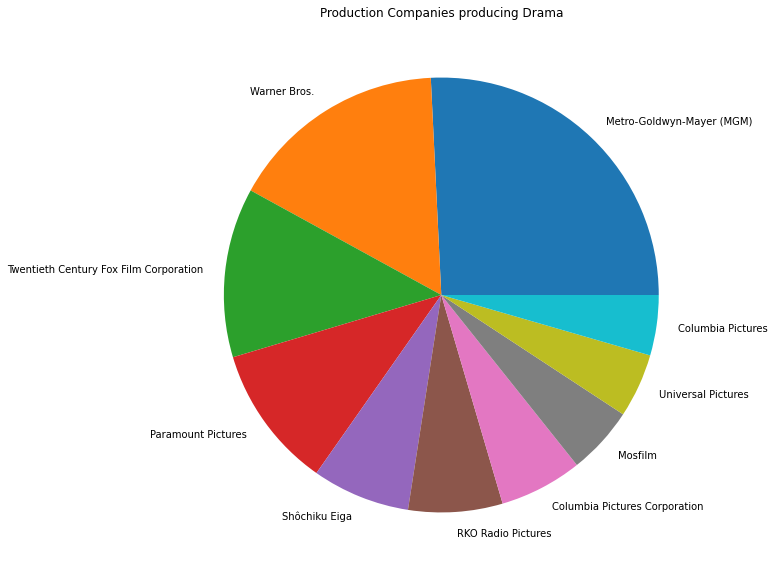

In [53]:
prod_house=[]
count=[]
for i in ana[1:]:
    prod_house.append(i['_id'])
    count.append(i['count'])

plt.figure(figsize = (10,10))   
plt.pie(np.array(count), labels = prod_house)
plt.title('Production Companies producing Drama')
plt.show() 

#### List of top 10 Dramas based on popularity

In [156]:
s=db.movies_metadata.aggregate( [
   {'$match':{"genres": "Drama"}},
    { '$sort': { 'popularity':-1}},
    { '$limit' : 10},
   {'$project': {'_id':0,'original_title':1,'runtime':1,'popularity':1}}
   
])

for i in s:
    print(i)

{'original_title': "Lorenzo's Oil", 'popularity': '9.968395', 'runtime': '135.0'}
{'original_title': 'Den sommeren jeg fylte 15', 'popularity': '9.95301', 'runtime': '98.0'}
{'original_title': 'Il conformista', 'popularity': '9.931025', 'runtime': '107.0'}
{'original_title': 'Little Birds', 'popularity': '9.920478999999998', 'runtime': '94.0'}
{'original_title': '20th Century Women', 'popularity': '9.855927000000001', 'runtime': '119.0'}
{'original_title': "Get Rich or Die Tryin'", 'popularity': '9.820229', 'runtime': '117.0'}
{'original_title': 'Invincible', 'popularity': '9.794881', 'runtime': '105.0'}
{'original_title': 'Goal!: The Dream Begins', 'popularity': '9.783762', 'runtime': '118.0'}
{'original_title': 'The Other Boleyn Girl', 'popularity': '9.778825999999999', 'runtime': '115.0'}
{'original_title': 'Iron Jawed Angels', 'popularity': '9.771121', 'runtime': '125.0'}


#### Top 30 dramas with highest vote average (Common words) 

In [56]:
## anything common between the top 30 dramas?
s=db.movies_metadata.aggregate( [
    
    {'$match':{"genres": "Drama"}},
    { '$sort': { 'popularity':-1}},
    { '$limit' : 50},
    {'$project': {'_id':0,'overview':1}}
])

ana=[]
for i in s:
    ana.append(i)

overview=[]
for i in ana:
    overview.append(i['overview'])
    
def freq(str):
    word_count={} 
    str = str.split()         
    str2 = []
    for i in str:             
        if i not in str2:
            str2.append(i) 
              
    for i in range(0, len(str2)):
        if(str.count(str2[i])>10):
            word_count[str2[i]]= str.count(str2[i])
    return word_count

lis=freq(' '.join(overview))
print(dict(sorted(lis.items(), key=lambda item: item[1],reverse=True)))

{'the': 122, 'a': 88, 'to': 86, 'of': 77, 'and': 73, 'his': 41, 'is': 34, 'in': 33, 'with': 26, 'her': 24, 'for': 22, 'their': 21, 'an': 20, 'who': 20, 'he': 17, 'by': 17, 'that': 13, 'on': 13, 'they': 12, 'A': 11}


#### Paramount Genre split

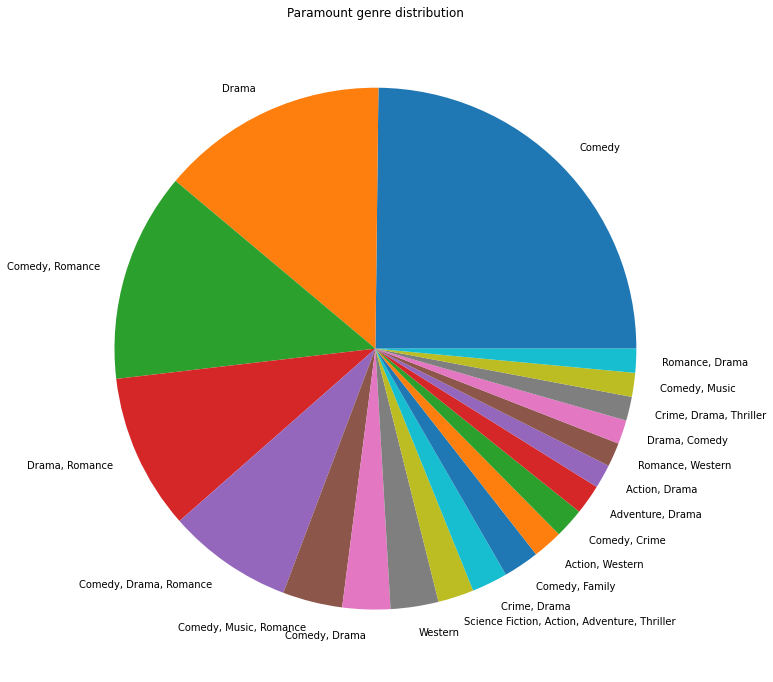

In [57]:
s=db.movies_metadata.aggregate( [
    {'$match':{"production_companies": "Paramount Pictures"}},
    {'$group' : {'_id' : "$genres", 'count' : {'$sum' :1}}}, 
    { '$sort': { 'count': -1 }},
    {'$project': {'_id':1,'count':1}},
    {'$limit':20}
    
    
])

ana=[]
for i in s:
    ana.append(i)

genre=[]
count=[]
for i in ana:
    genre.append(i['_id'])
    count.append(i['count'])

plt.figure(figsize = (12,12))   
plt.pie(np.array(count), labels = genre)
plt.title('Paramount genre distribution')
plt.show()     

#### Average runtime for production houses

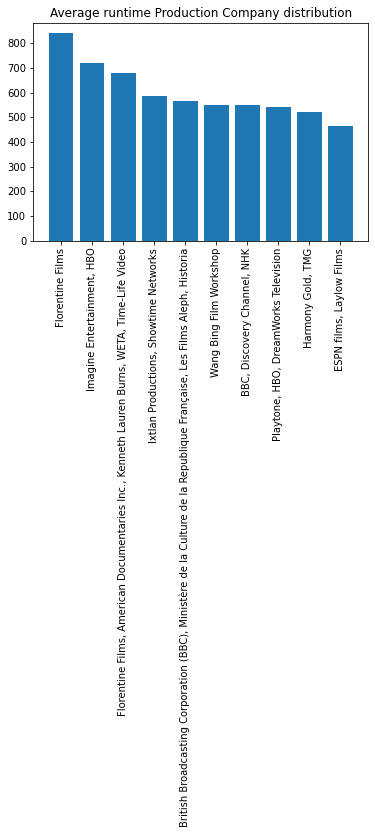

In [59]:
## average runtime
priceQtyConversionStage = {
   '$addFields': {
      'converted_runtime': { '$convert': { 
              'input': "$runtime", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
   }
};



s=db.movies_metadata.aggregate( [
    priceQtyConversionStage,
    {'$group' : {'_id' : '$production_companies', 'count' : {'$avg' :"$converted_runtime"}}}, 
    { '$sort': { 'count': -1 }},
    {'$project': {'_id':1,'production_companies':1,'count':1}},
    {'$limit':10}
    
])

ana=[]
for i in s:
    ana.append(i)

prod_hou=[]
count=[]
for i in ana:
    prod_hou.append(i['_id'])
    count.append(i['count'])

plt.bar(prod_hou, count)
plt.xticks(rotation=90)
plt.title('Average runtime Production Company distribution')
plt.show()     

#### MIlitary word trend

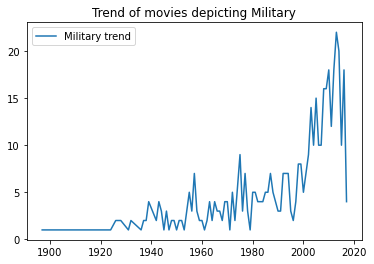

In [60]:
db.movies_metadata.drop_index( "plt_index" )
db.movies_metadata.create_index(name='plt_index', keys=[('overview', "text")], default_language='english',language_override='english')
query=db.movies_metadata.aggregate([ 
    { '$match': {"$text": {"$search": "Military"}}},
    { '$project' : {'_id':0,'title':1,'release_date':1}}
])
ana=[]
for i in query:
    ana.append(i)
    
release_date=[]   
for i in ana:
    release_date.append(datetime.strptime(i['release_date'], '%d-%m-%Y').year)

release_date.sort()

from collections import Counter
s=Counter(release_date)

plt.plot(list(dict(s).keys()),list(dict(s).values()),label='Military trend')
plt.legend()
plt.title('Trend of movies depicting Military')
plt.show()   

#### Comedy Horror trend

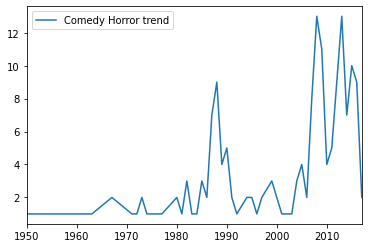

In [93]:
priceQtyConversionStage = {
   '$addFields': {
       
       'converted_popularity': { '$convert': { 
              'input': "$popularity", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
   }
};

matching= { '$match': { 'genres': { '$eq': 'Comedy, Horror' } }};


s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   matching,
   {'$group' : {'_id' : '$release_date', 'count' : {'$sum' :1}}},
   {'$project': {'_id':1,'count':1}},  
    { '$sort': { 'count':-1}}
])

ana=[]
for i in s:
    ana.append(i)
    
release_date=[]   
for i in ana:
    release_date.append(datetime.strptime(i['_id'], '%d-%m-%Y').year)

release_date.sort()

from collections import Counter
s=Counter(release_date)

plt.plot(list(dict(s).keys()),list(dict(s).values()),label='Comedy Horror trend')
plt.legend()
plt.xlim(1950,2017)
plt.show()   

#### Crime, Mystery, Thriller trend

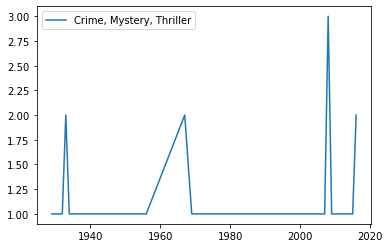

In [61]:
matching= { '$match': { 'genres': { '$eq': 'Crime, Mystery, Thriller' } }};


s=db.movies_metadata.aggregate( [
   matching,
   {'$group' : {'_id' : '$release_date', 'count' : {'$sum' :1}}},
   {'$project': {'_id':1}},  
    { '$sort': { 'count':-1}}
])

ana=[]
for i in s:
    ana.append(i)
    
release_date=[]   
for i in ana:
    release_date.append(datetime.strptime(i['_id'], '%d-%m-%Y').year)

release_date.sort()

from collections import Counter
s=Counter(release_date)

plt.plot(list(dict(s).keys()),list(dict(s).values()),label='Crime, Mystery, Thriller')
plt.legend()
plt.show()   

#### Global revenue

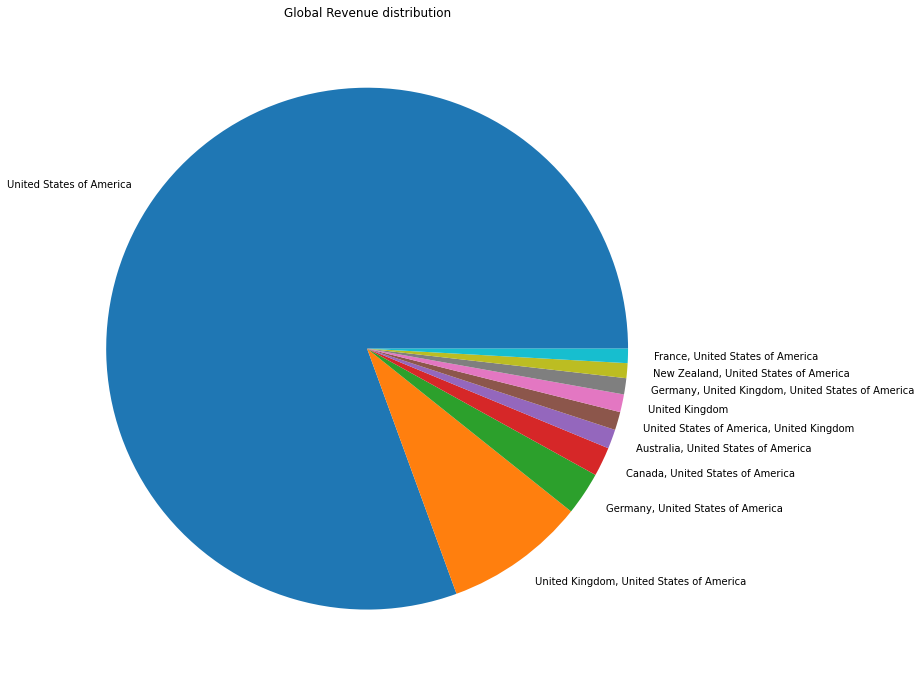

In [62]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   matching,
    {'$group' : {'_id' : "$production_countries", 'count' : {'$sum' : '$converted_revenue'}}}, 
    { '$sort': { 'count': -1 }},
    {'$project':{'_id':1,'count':1}},
    {'$limit':10}
])

ana=[]
for i in s:
    ana.append(i)
    


country=[]
count=[]
for i in ana:
    country.append(i['_id'])
    count.append(i['count'])

plt.figure(figsize = (12,12))   
plt.pie(np.array(count), labels = country)
plt.title('Global Revenue distribution')
plt.show()     

#### USA revenue trend

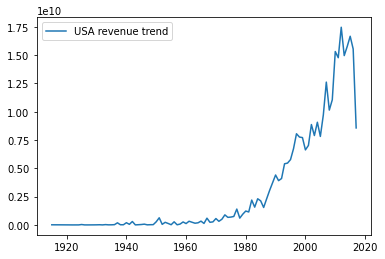

In [277]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
        "created_at": { 
            "$dateFromString": { 
                "dateString": "$release_date",
                "format": "%d-%m-%Y" 
            } 
        }
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   {'$match':{'production_countries':'United States of America'}},
   matching,
    {'$group' : {'_id' : "$release_date", 'count' : {'$sum' : '$converted_revenue'}}}, 
    {'$sort':{'created_at':1}}
])

ana=[]
for i in s:
    ana.append(i)
    
release_year=[]
rev=[]
for i in ana:
    release_year.append(datetime.strptime(i['_id'], '%d-%m-%Y').year)
    rev.append(i['count'])

final=np.unique(np.array(release_year))
year_revenue={}
for j in final:
    indices = [i for i, x in enumerate(release_year) if x == j]
    summ=0
    for ind in indices:
        summ+=rev[ind]
    year_revenue[j]=summ


plt.plot(list(year_revenue.keys()),list(year_revenue.values()),label='USA revenue trend')
plt.legend()
plt.show()   

#### Science Fiction World count

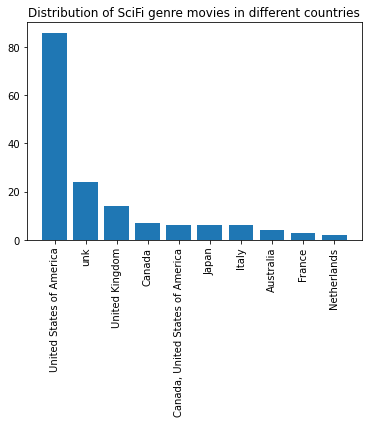

In [63]:
s=db.movies_metadata.aggregate( [
   {'$match':{'genres':'Science Fiction'}},
    {'$group' : {'_id' : "$production_countries", 'count' : {'$sum' : 1}}}, 
    {'$sort':{'count':-1}},
     {'$limit':10}
])

ana=[]
for i in s:
    ana.append(i)

prod_count=[]
count=[]
for i in ana:
    prod_count.append(i['_id'])
    count.append(i['count'])

plt.bar(prod_count, count)
plt.xticks(rotation=90)
plt.title('Distribution of SciFi genre movies in different countries')
plt.show()     

#### India trend revenue

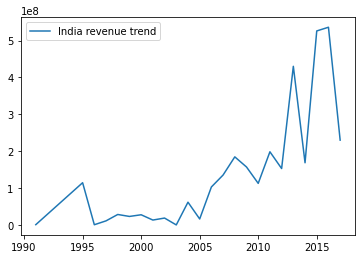

In [278]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
        "created_at": { 
            "$dateFromString": { 
                "dateString": "$release_date",
                "format": "%d-%m-%Y" 
            } 
        }
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   {'$match':{'production_countries':'India'}},
   matching,
    {'$group' : {'_id' : "$release_date", 'count' : {'$sum' : '$converted_revenue'}}}, 
    {'$sort':{'created_at':1}}
])

ana=[]
for i in s:
    ana.append(i)
    
release_year=[]
rev=[]
for i in ana:
    release_year.append(datetime.strptime(i['_id'], '%d-%m-%Y').year)
    rev.append(i['count'])

final=np.unique(np.array(release_year))
year_revenue={}
for j in final:
    indices = [i for i, x in enumerate(release_year) if x == j]
    summ=0
    for ind in indices:
        summ+=rev[ind]
    year_revenue[j]=summ


plt.plot(list(year_revenue.keys()),list(year_revenue.values()),label='India revenue trend')
plt.legend()
plt.show()  

#### Indian Genre count

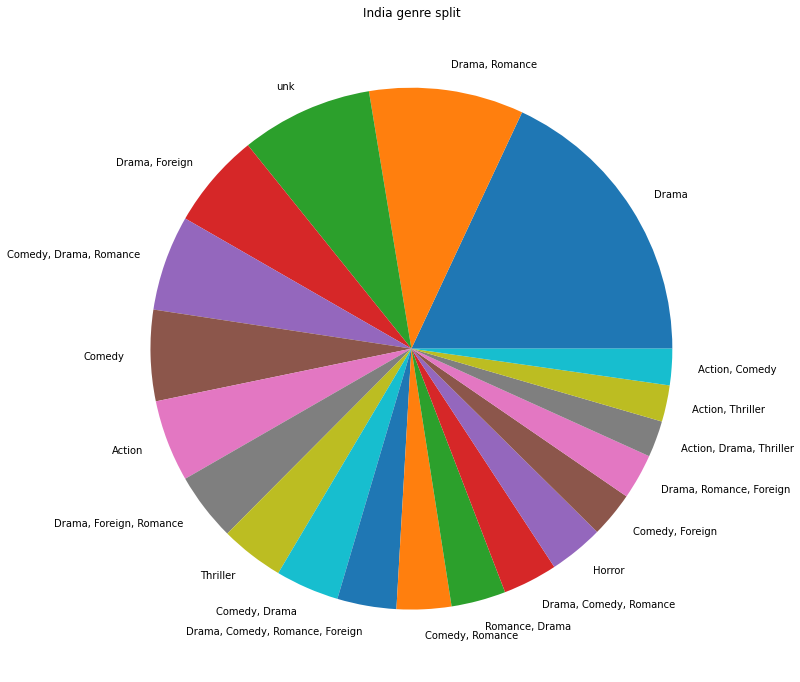

In [281]:
s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   {'$match':{'production_countries':'India'}},
    {'$group' : {'_id' : "$genres", 'count' : {'$sum' : 1}}}, 
    {'$sort':{'count':-1}},
    {'$limit':20}
])

ana=[]
for i in s:
    ana.append(i)
    
genre=[]
count=[]
for i in ana:
    genre.append(i['_id'])
    count.append(i['count'])

plt.figure(figsize = (12,12))   
plt.pie(np.array(count), labels = genre)
plt.title('India genre split')
plt.show()     

#### Indian Production company total revenue

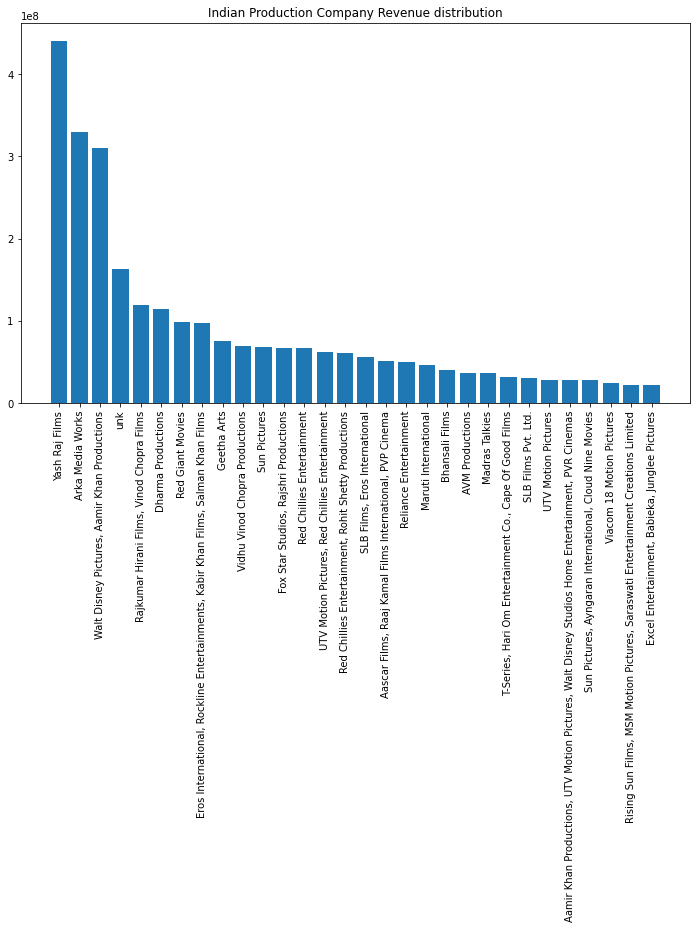

In [66]:
priceQtyConversionStage = {
   '$addFields': {
      'converted_budget': { '$convert': { 
              'input': "$budget", 
              'to': "int",
              'onError': int("0"),
              'onNull': int("0") 
            }},
       
      'converted_revenue': { '$convert': { 
              'input': "$revenue", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
        "created_at": { 
            "$dateFromString": { 
                "dateString": "$release_date",
                "format": "%d-%m-%Y" 
            } 
        }
   }
};

matching= { '$match': { '$and': [ { 'converted_budget': { '$gt':0 } }, { 'converted_revenue': { '$gt' :0 } } ] } };


s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   {'$match':{'production_countries':'India'}},
   matching,
    {'$group' : {'_id' : "$production_companies", 'count' : {'$sum' : '$converted_revenue'}}}, 
    {'$sort':{'count':-1}},
    {'$limit':30}
])

ana=[]
for i in s:
    ana.append(i)
    
prod_comp=[]
reve=[]
for i in ana:
    prod_comp.append(i['_id'])
    reve.append(i['count'])


plt.figure(figsize = (12,7))
plt.bar(prod_comp, reve)
plt.title('Indian Production Company Revenue distribution')
plt.xticks(rotation=90)
plt.show()

#### Genre based on popularity in India

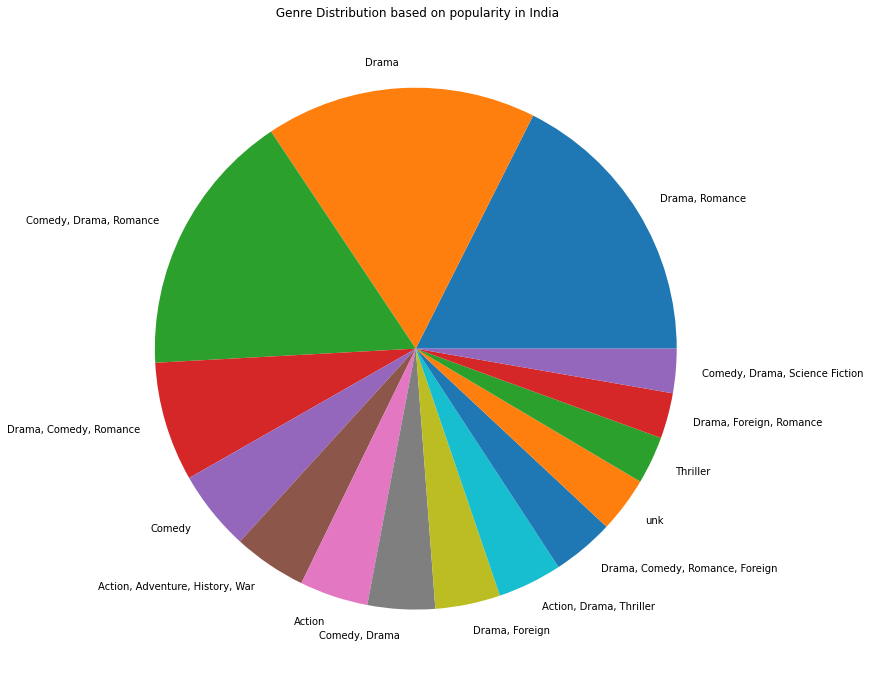

In [67]:
# india
priceQtyConversionStage = {
   '$addFields': {
      
      'converted_popularity': { '$convert': { 
              'input': "$popularity", 
              'to': "double",
              'onError': int("0"),
              'onNull': int("0") 
            }},
        "created_at": { 
            "$dateFromString": { 
                "dateString": "$release_date",
                "format": "%d-%m-%Y" 
            } 
        }
   }
};


s=db.movies_metadata.aggregate( [
   priceQtyConversionStage,
   {'$match':{'production_countries':'India'}},
    {'$group' : {'_id' : "$genres", 'count' : {'$sum' : '$converted_popularity'}}}, 
    {'$sort':{'count':-1}},
    {'$limit':15}
])

ana=[]
for i in s:
    ana.append(i)
    
genre=[]
pop=[]
for i in ana:
    genre.append(i['_id'])
    pop.append(i['count'])

plt.figure(figsize = (12,12))   
plt.pie(np.array(pop), labels = genre)
plt.title(' Genre Distribution based on popularity in India')
plt.show()     

#### Trend of vote count in India (shows exposure)

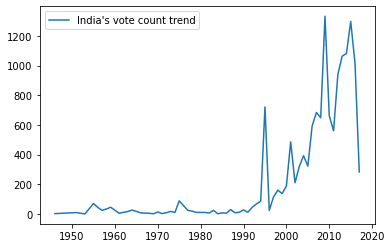

In [73]:
s=db.movies_metadata.aggregate( [
   {'$match':{'production_countries':'India'}},
    {'$project':{'_id' : 0, "release_date":1, 'vote_count':1}}
])

ana=[]
for i in s:
    ana.append(i)
    
release_year=[]
rev=[]
for i in ana:
    release_year.append(datetime.strptime(i['release_date'], '%d-%m-%Y').year)
    rev.append(int(float(i['vote_count'])))

final=np.unique(np.array(release_year))
year_revenue={}
for j in final:
    indices = [i for i, x in enumerate(release_year) if x == j]
    summ=0
    for ind in indices:
        summ+=rev[ind]
    year_revenue[j]=summ


plt.plot(list(year_revenue.keys()),list(year_revenue.values()),label="India's vote count trend")
plt.legend()
plt.show()   